In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("../data/raw/iu.txt")
df1 = df1.dropna()
df1['fecha'] = df1['Ano'].astype(str) + '-' + df1['Mes'].astype(str) + '-' + df1['Dia'].astype(str)
df1['fecha'] = pd.to_datetime(df1['fecha'])
df1 = df1.groupby('fecha').agg({
    'U': 'mean',
    'V': 'mean',
    'UI': 'mean'
})

df2 = pd.read_csv("../data/raw/cangasb.csv")
df2['fecha'] = pd.to_datetime(df2['dia'], format="%d/%m/%Y")

df_combined = pd.merge(df1, df2, on='fecha', how='outer')
columnas_a_eliminar = ['U', 'V', 'dia']
df_combined = df_combined.drop(columns=columnas_a_eliminar)
df_combined.set_index('fecha', inplace=True)

df_combined



,UI,abierto/cerrado
fecha,,
2010-03-04,745.72500,0
2010-03-05,465.79250,0
2010-03-06,736.25750,0
2010-03-07,430.45650,0
2010-03-08,1628.83250,0
...,...,...
2019-02-27,-923.06750,0
2019-02-28,-515.32500,0
2019-03-01,-500.33675,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


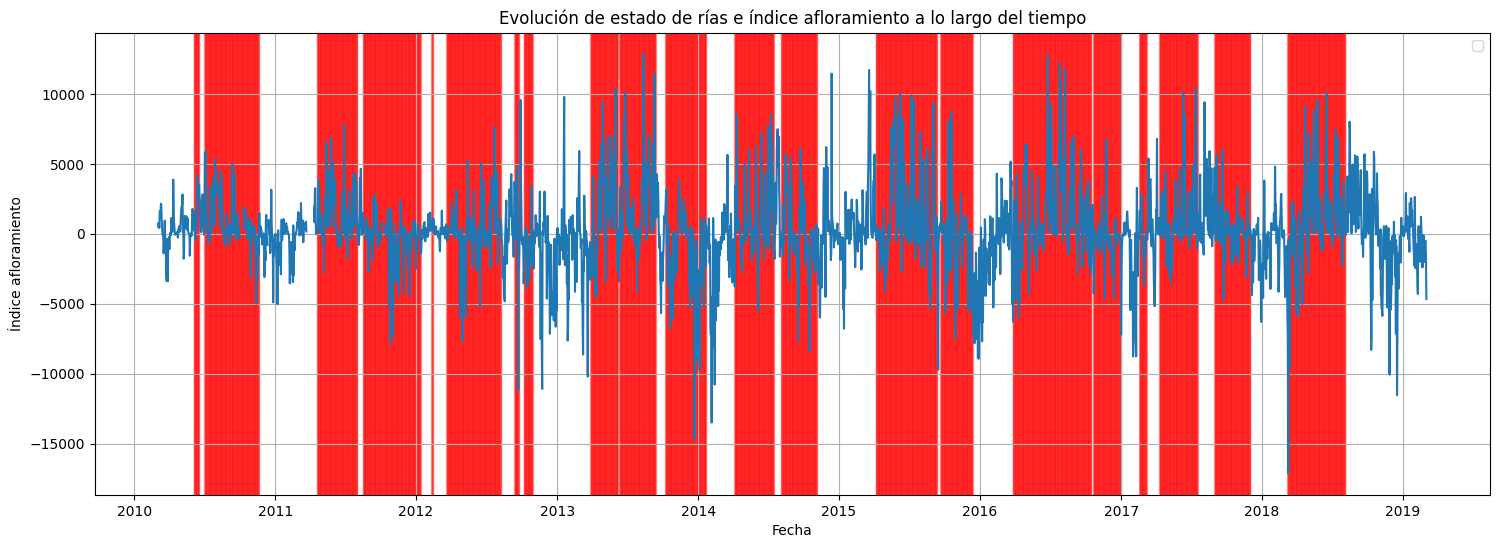

In [2]:
plt.figure(figsize=(18,6))
plt.plot(df_combined.index, df_combined['UI'])
plt.title('Evolución de estado de rías e índice afloramiento a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Índice afloramiento')

for i in range(len(df_combined)):
    current_index = df_combined.index[i]
    color_value = df_combined['abierto/cerrado'].iloc[i]
    if color_value == 1:
        if i + 1 < len(df_combined):
            next_index = df_combined.index[i + 1]
        else:
            next_index = df_combined.index[-1]   
        plt.axvspan(current_index, next_index, color='red', alpha=0.3)
        
plt.legend()
plt.grid(True)
plt.show()

In [4]:
df_combined.to_csv('../data/processed/cangas_IU.csv')